In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn. preprocessing import normalize

In [2]:
data = pd.read_csv('housing.csv')
X_ = data.drop(['ocean_proximity','total_bedrooms'], axis=1)
y = data['ocean_proximity']
X = (X_ - X_.mean(axis = 0))/X_.std(axis = 0)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25,
    stratify=y, random_state=42
)

In [6]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
y_test_predict = log.predict(X_test)
y_train_predict = log.predict(X_train)

In [8]:
err_train  = np.mean(y_train  != y_train_predict)
err_train

0.1939922480620155

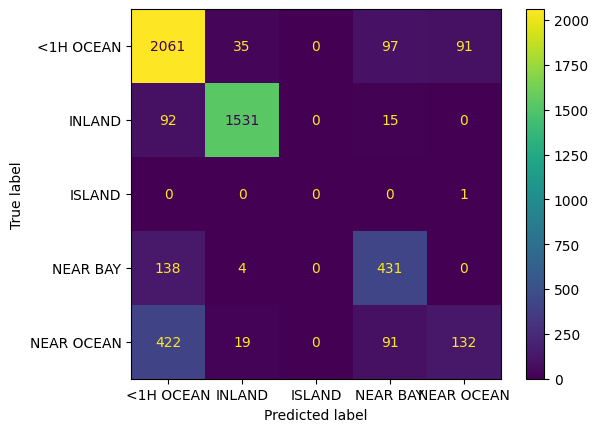

In [18]:
predictions = log.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log.classes_)
disp.plot()

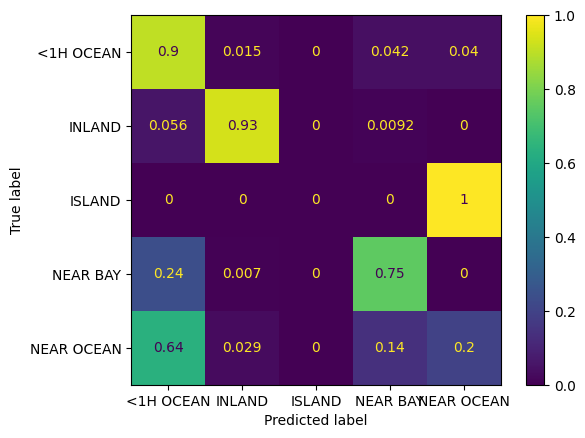

In [19]:
predictions = log.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=log.classes_)
cm = normalize(cm, axis= 1 , norm='l1')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log.classes_)
disp.plot()